## Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading In Data

In [ ]:
df_raw = pd.read_csv('../data/data_ml.csv')

## Filtering by Data for 2000-2018

In [ ]:
df_ml = df_raw.query('"1999-12-31" < date & date < "2019-01-01"')
df_ml.T.iloc[:,0:6]

,0,1,2,3,4,5
stock_id,13,13,13,17,17,17
date,2006-12-31,2007-01-31,2007-02-28,2015-03-31,2015-04-30,2015-05-31
Advt_12M_Usd,0.25,0.25,0.26,0.73,0.72,0.71
Advt_3M_Usd,0.33,0.32,0.3,0.64,0.62,0.63
Advt_6M_Usd,0.27,0.28,0.3,0.7,0.66,0.64
...,...,...,...,...,...,...
Vol3Y_Usd,0.88,0.88,0.88,0.99,0.99,0.99
R1M_Usd,0.089,0.039,-0.012,0.174,-0.106,-0.185
R3M_Usd,0.104,0.091,0.101,-0.144,-0.576,-0.252
R6M_Usd,0.344,-0.011,0.118,-0.518,-0.535,-0.578


## The Number of Assets Varies by Date

Text(0, 0.5, 'number of assets')

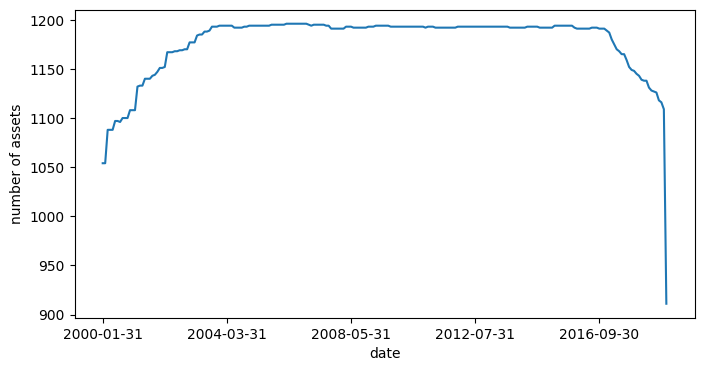

In [ ]:
pd.Series(df_ml.groupby('date').size()).plot(figsize=(8,4)) # counting the number of assets for each date
plt.ylabel('number of assets') 

## Summary Statistics of Labels

In [ ]:
df_ml[['R1M_Usd', 'R3M_Usd', 'R6M_Usd', 'R12M_Usd']].describe()

,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
count,268336.000000,268336.000000,268336.000000,268336.000000
mean,0.012732,0.036901,0.072339,0.136865
std,0.176431,0.328289,0.527420,0.737872
min,-0.922000,-0.929000,-0.980000,-0.991000
25%,-0.042000,-0.063000,-0.079000,-0.090000
50%,0.011000,0.030000,0.050000,0.080000
75%,0.064000,0.123000,0.186000,0.285000
max,30.176000,39.389000,106.929000,95.972000


## Saving Feature Names in a List

In [ ]:
features=list(df_ml.iloc[:,3:95].columns) # Keep the feature's column names (hard-coded, beware!)
features_short = [
    'Div_Yld',
    'Eps', 
    'Mkt_Cap_12M_Usd', 
    'Mom_11M_Usd', 
    'Ocf',
    'Pb', 
    'Vol1Y_Usd',
]

The predictors have been uniformized, that is, for any given feature and time point, the distribution is uniform. Given 1,207 stocks, the graph below cannot display a perfect rectangle.

<Axes: ylabel='Frequency'>

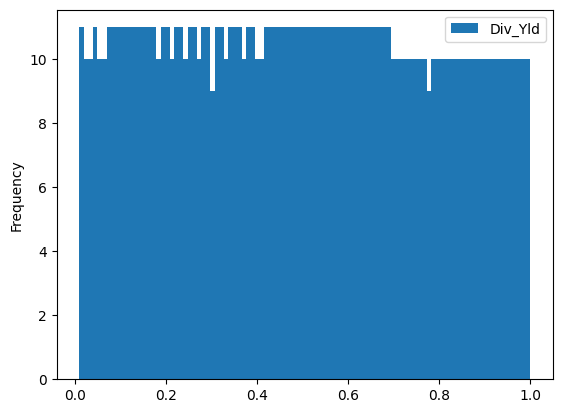

In [ ]:
df_ml.query('date == "2000-02-29"')[['Div_Yld']].plot(kind='hist', bins=100)

## Creating a Categorical Label

Here we are checking whether each stock was above or below the median return for a given date.

In [ ]:
df_median = df_ml[['date','R1M_Usd','R12M_Usd']].groupby(['date']).median() # computings medians for both labels at each date 
df_median.reset_index(inplace=True)
df_median.rename(columns={'R1M_Usd':'R1M_Usd_median', 'R12M_Usd':'R12M_Usd_median'}, inplace=True)
#df_median
df = pd.merge(df_ml, df_median, how='left', on=['date'])
df['R1M_Usd_C'] = np.where(df['R1M_Usd'] > df['R1M_Usd_median'], 1.0, 0.0)
df['R12M_Usd_C'] = np.where(df['R12M_Usd'] > df['R12M_Usd_median'], 1.0, 0.0)
df_ml = df

In [ ]:
df_ml

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd,R1M_Usd_median,R12M_Usd_median,R1M_Usd_C,R12M_Usd_C
0,13,2006-12-31,0.25,0.33,0.27,0.22,0.33,0.01,0.13,0.84,...,0.84,0.88,0.089,0.104,0.344,-0.041,0.019,-0.0560,1.0,1.0
1,13,2007-01-31,0.25,0.32,0.28,0.22,0.40,0.01,0.13,0.84,...,0.84,0.88,0.039,0.091,-0.011,-0.253,0.006,-0.0965,1.0,0.0
2,13,2007-02-28,0.26,0.30,0.30,0.22,0.15,0.01,0.13,0.84,...,0.87,0.88,-0.012,0.101,0.118,-0.366,0.006,-0.1350,0.0,0.0
3,17,2015-03-31,0.73,0.64,0.70,0.40,0.47,0.01,0.70,0.74,...,1.00,0.99,0.174,-0.144,-0.518,-0.376,-0.025,-0.0320,1.0,0.0
4,17,2015-04-30,0.72,0.62,0.66,0.40,0.46,0.01,0.70,0.74,...,1.00,0.99,-0.106,-0.576,-0.535,-0.113,0.011,-0.0035,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268331,1205,2004-05-31,0.97,0.97,0.98,0.19,0.74,1.00,0.54,0.90,...,0.34,0.63,-0.029,-0.027,0.038,0.112,0.041,0.0980,0.0,1.0
268332,1205,2004-07-31,0.97,0.96,0.98,0.19,0.75,1.00,0.53,0.90,...,0.29,0.64,0.028,0.077,0.175,0.122,0.007,0.1900,1.0,0.0
268333,1205,2004-08-31,0.97,0.96,0.97,0.19,0.75,1.00,0.53,0.90,...,0.27,0.64,0.011,0.076,0.152,0.091,0.039,0.1550,0.0,0.0
268334,1205,2004-09-30,0.97,0.96,0.97,0.18,0.93,1.00,0.52,0.90,...,0.26,0.66,0.045,0.178,0.196,0.040,0.020,0.1155,1.0,0.0


## Writing to CSV

In [ ]:
df_ml.to_csv('../data/data_ml_chapter_1.csv', index=False)